### PROJECT STUDENT PERFORMANCE - AMELIA EVITA ALAM ####

### 1. Problem Statement (Permasalahan apa yang akan diselesaikan?)

"Memprediksi nilai ujian akhir siswa berdasarkan faktor demografi, kebiasaan belajar, dan dukungan keluarga"

### 2. Data Collection (Pengumpulan Data)

Data diambil dari : https://www.kaggle.com/datasets/devansodariya/student-performance-data/data

In [45]:
# Panggil Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('student_data.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


### Tools yang kita gunakan :

| No. | Kolom        | Deskripsi                                                                                                      |
| --- | ------------ | -------------------------------------------------------------------------------------------------------------- |
| 1   | `school`     | Jenis sekolah (0 = GP, 1 = MS)                                                                                 |
| 2   | `sex`        | Jenis kelamin siswa (0 = perempuan, 1 = laki-laki)                                                             |
| 3   | `age`        | Usia siswa (dalam tahun)                                                                                       |
| 4   | `address`    | Tipe alamat tempat tinggal (0 = urban, 1 = rural)                                                              |
| 5   | `famsize`    | Ukuran keluarga (0 = besar, 1 = kecil)                                                                         |
| 6   | `Pstatus`    | Status hubungan orang tua (0 = bersama, 1 = terpisah)                                                          |
| 7   | `Medu`       | Pendidikan ibu (0 = tidak diketahui, 1 = rendah, 2 = menengah, 3 = tinggi)                                     |
| 8   | `Fedu`       | Pendidikan ayah (0 = tidak diketahui, 1 = rendah, 2 = menengah, 3 = tinggi)                                    |
| 9   | `Mjob`       | Pekerjaan ibu (1 = kesehatan, 2 = layanan pendidikan, 3 = manajemen, 4 = rumah tangga, 5 = lain)               |
| 10  | `Fjob`       | Pekerjaan ayah (1 = kesehatan, 2 = layanan pendidikan, 3 = manajemen, 4 = rumah tangga, 5 = lain)              |
| 11  | `reason`     | Alasan memilih sekolah ini (0 = alasan keluarga, 1 = alasan sekolah, 2 = alasan teman, 3 = lain)               |
| 12  | `guardian`   | Wali siswa (0 = ibu, 1 = ayah, 2 = lainnya)                                                                    |
| 13  | `traveltime` | Waktu perjalanan ke sekolah (1 = <15 menit, 2 = 15–30 menit, 3 = 30–60 menit, 4 = >60 menit)                   |
| 14  | `studytime`  | Waktu belajar per minggu (1 = <2 jam, 2 = 2–5 jam, 3 = 5–10 jam, 4 = >10 jam)                                  |
| 15  | `failures`   | Jumlah kegagalan sebelumnya (numeric: 0, 1, 2, 3+)                                                             |
| 16  | `schoolsup`  | Dukungan sekolah tambahan (0 = tidak, 1 = ya)                                                                  |
| 17  | `famsup`     | Dukungan keluarga untuk belajar (0 = tidak, 1 = ya)                                                            |
| 18  | `paid`       | Les privat tambahan (0 = tidak, 1 = ya)                                                                        |
| 19  | `activities` | Kegiatan ekstrakurikuler (0 = tidak, 1 = ya)                                                                   |
| 20  | `nursery`    | Pendidikan prasekolah (0 = tidak, 1 = ya)                                                                      |
| 21  | `higher`     | Keinginan untuk melanjutkan pendidikan tinggi (0 = tidak, 1 = ya)                                              |
| 22  | `internet`   | Akses internet di rumah (0 = tidak, 1 = ya)                                                                    |
| 23  | `romantic`   | Status hubungan romantis (0 = tidak, 1 = ya)                                                                   |
| 24  | `famrel`     | Kualitas hubungan keluarga (1 = sangat buruk, 2 = buruk, 3 = rata-rata, 4 = baik, 5 = sangat baik)             |
| 25  | `freetime`   | Waktu luang setelah sekolah (1 = sangat sedikit, 2 = sedikit, 3 = cukup, 4 = banyak, 5 = sangat banyak)        |
| 26  | `goout`      | Frekuensi pergi keluar bersama teman (1 = sangat jarang, 2 = jarang, 3 = cukup, 4 = sering, 5 = sangat sering) |
| 27  | `Dalc`       | Konsumsi alkohol pada hari kerja (1 = sangat rendah, 2 = rendah, 3 = sedang, 4 = tinggi, 5 = sangat tinggi)    |
| 28  | `Walc`       | Konsumsi alkohol pada akhir pekan (1 = sangat rendah, 2 = rendah, 3 = sedang, 4 = tinggi, 5 = sangat tinggi)   |
| 29  | `health`     | Kondisi kesehatan (1 = sangat buruk, 2 = buruk, 3 = rata-rata, 4 = baik, 5 = sangat baik)                      |
| 30  | `absences`   | Jumlah ketidakhadiran (numeric)                                                                                |
| 31  | `G1`         | Nilai pertama (semester pertama)                                                                               |
| 32  | `G2`         | Nilai kedua (semester kedua)                                                                                   |
| 33  | `G3`         | Nilai akhir (target variabel)                                                                                  |


## 3. Exploratory Data Analysis (EDA)
Tujuan : Untuk memahami kondisi data, menemukan masalah atau pola tersembunyi, dan mempersiapkan data agar siap digunakan dala pemodelan Machine Learning atau analisis lebih lanjut.

In [46]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [48]:
#untuk melihat struktur datanya
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Berdasarkan Hasil diatas bahwa tidak ditemukan nilai yang kosong

In [49]:
print(df.describe())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

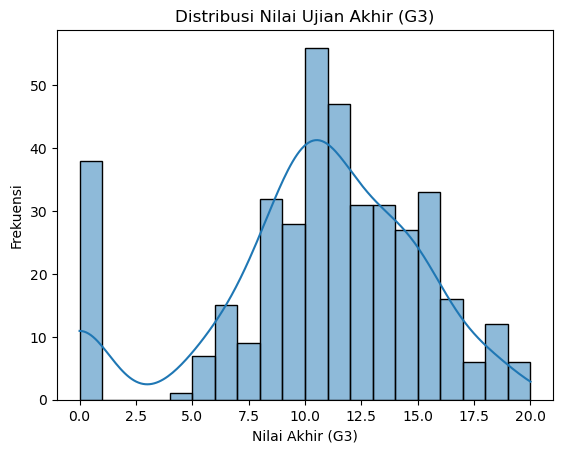

In [50]:
# Distribusi Target (G3)
sns.histplot(x='G3', bins= 20, kde= True, data = df)
plt.xlabel("Nilai Akhir (G3)")
plt.ylabel("Frekuensi") # Frekuensi diambil dari jumlah kemunculan data pada setiap interval nilai. Interval nilai itu sendiri dibentuk berdasarkan rentang nilai yang ada pada data G3.
plt.title('Distribusi Nilai Ujian Akhir (G3)')
plt.show()

In [51]:
# Melakukan perubahan data pada dataset G3 
df['G3_original'] = df['G3']  #untuk menyimpan nilai asli
df['G3'] = df['G3'].apply(lambda x: 'Lulus' if x >= 10 else 'Tidak Lulus') # Mengubah nilai G3 menjadi kategori Lulus dan Tidak Lulus


=== Demografi ===


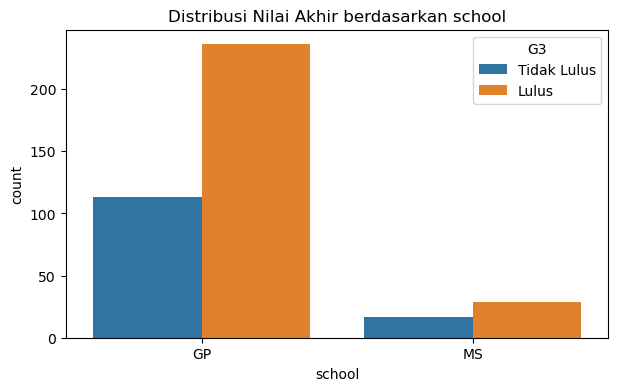

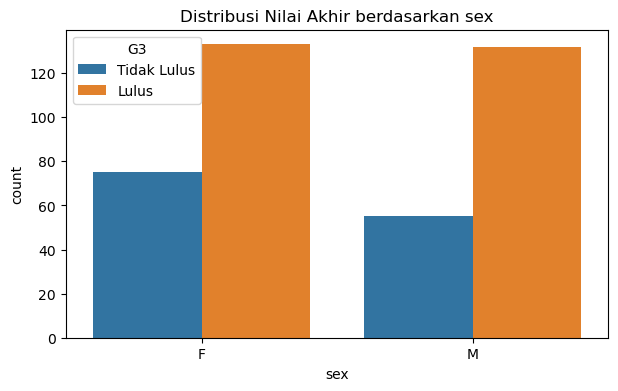

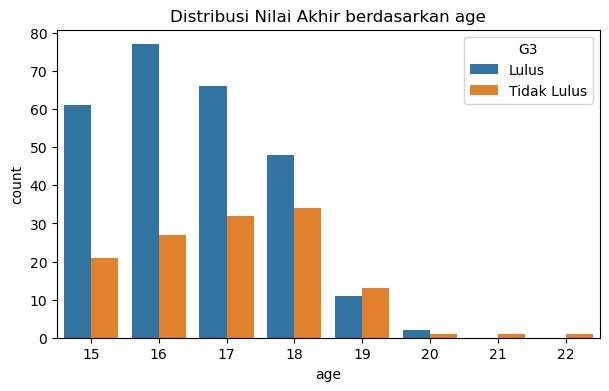

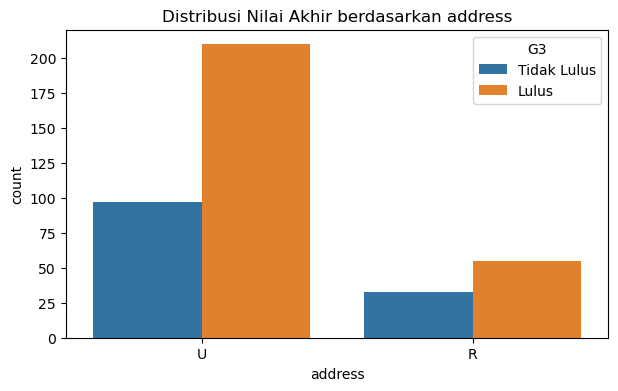

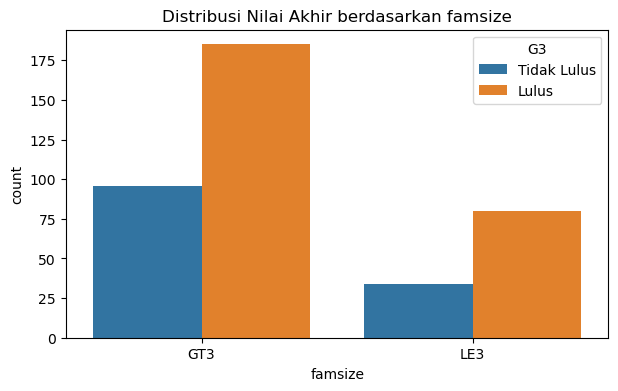

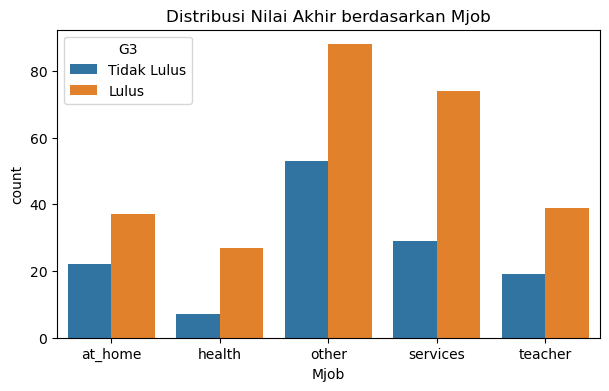

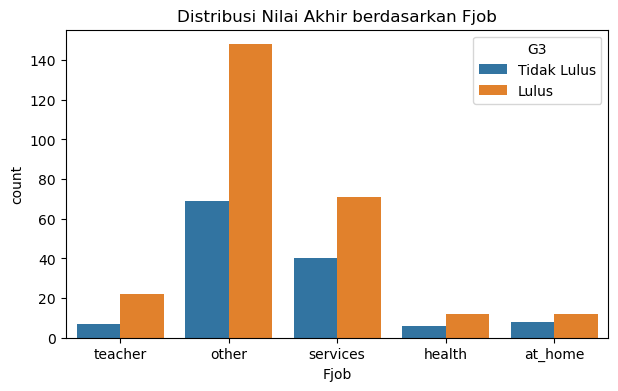

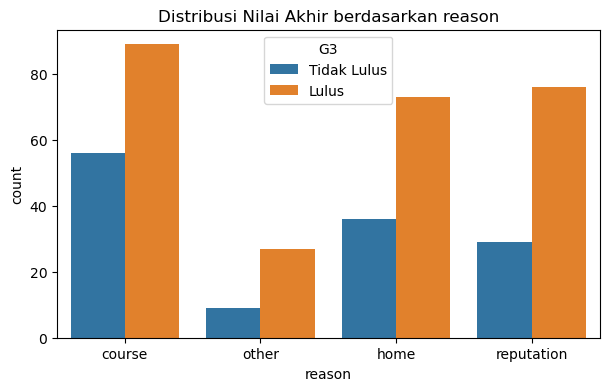

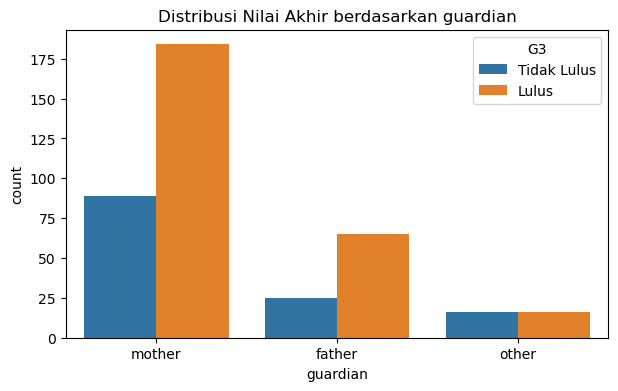


=== Kebiasaan Belajar ===


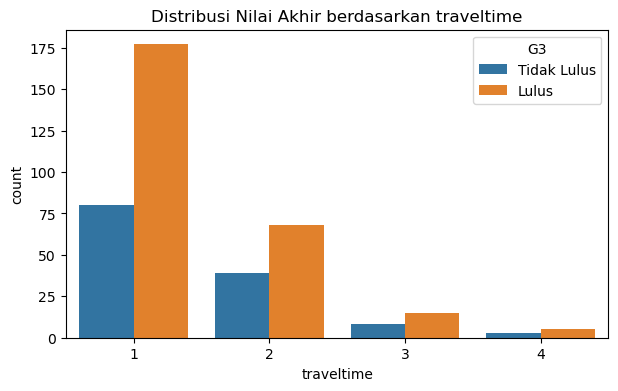

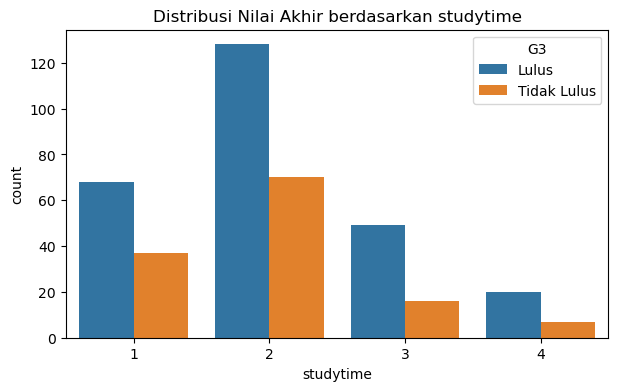

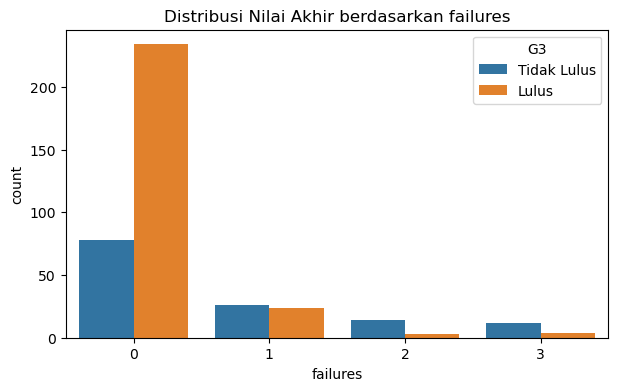

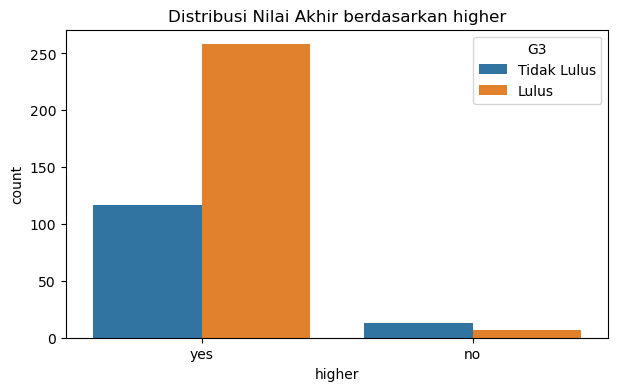

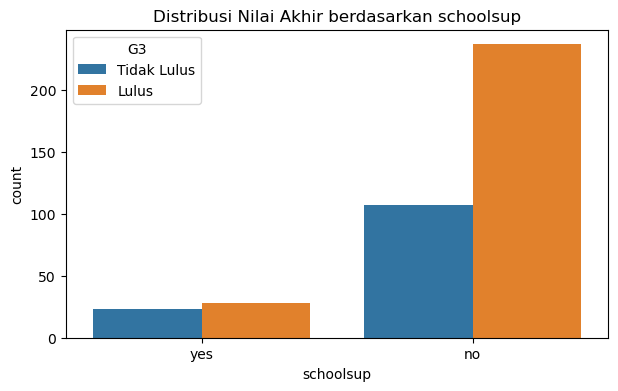

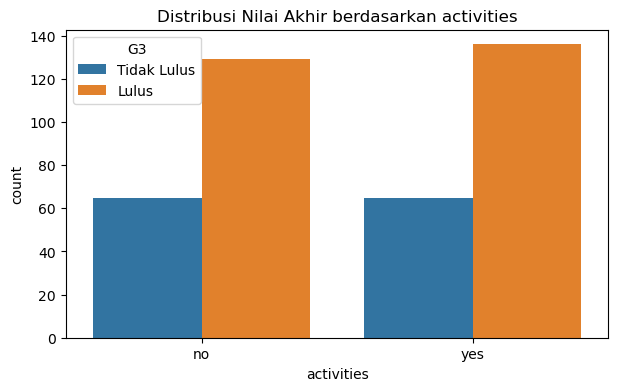

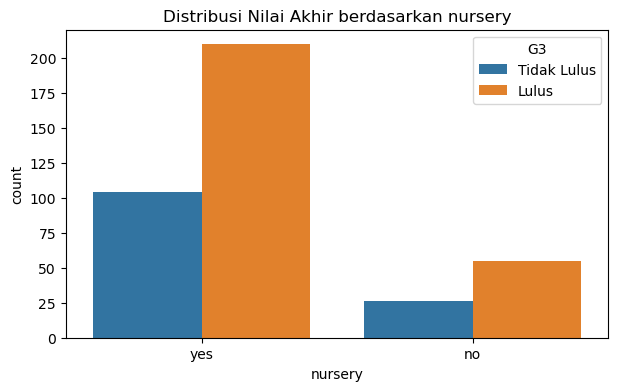

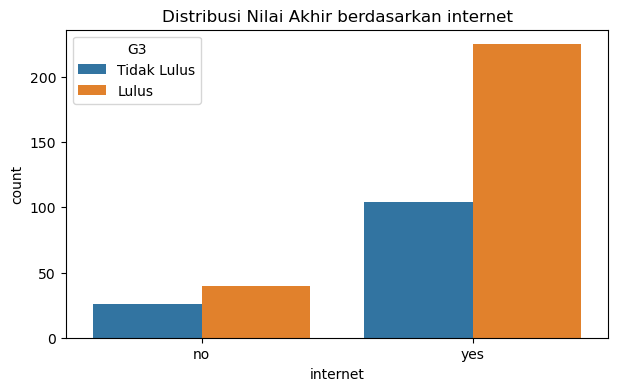

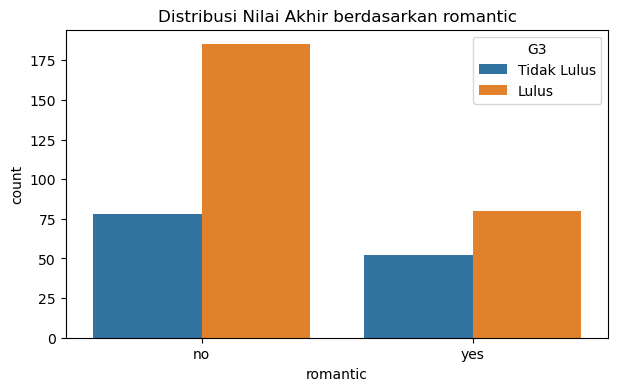

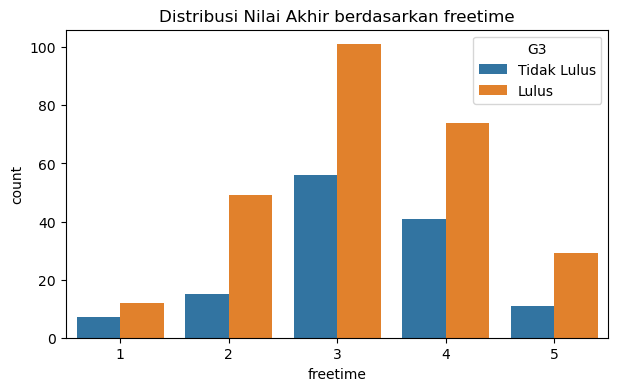

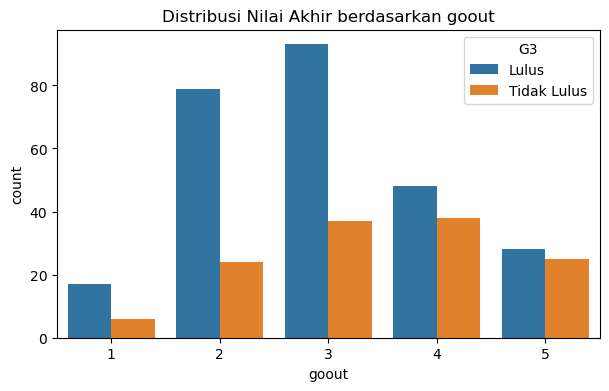

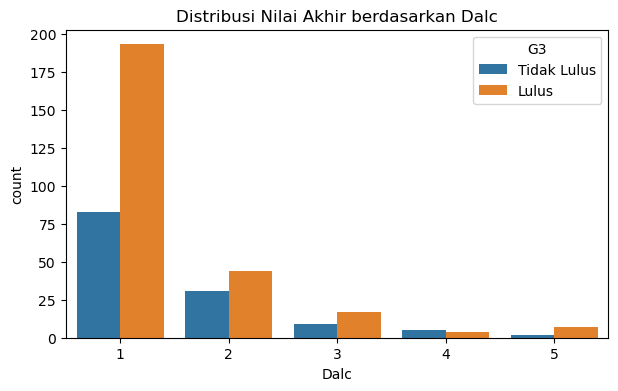

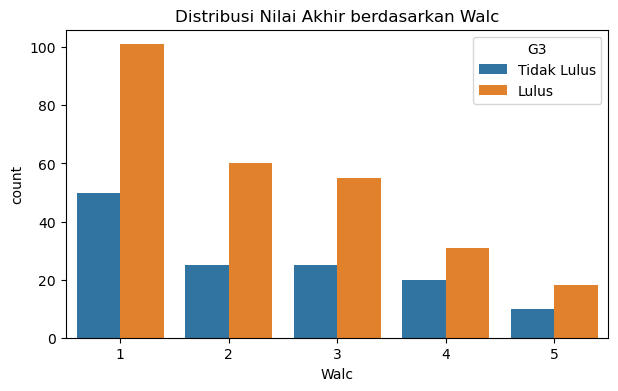

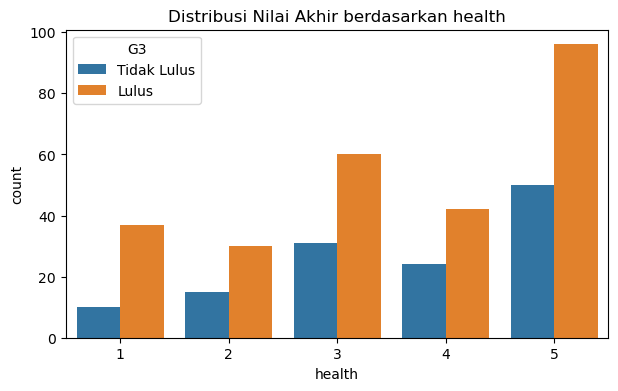

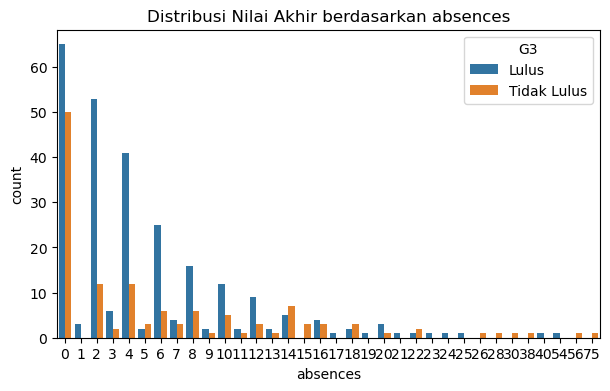


=== Dukungan Keluarga ===


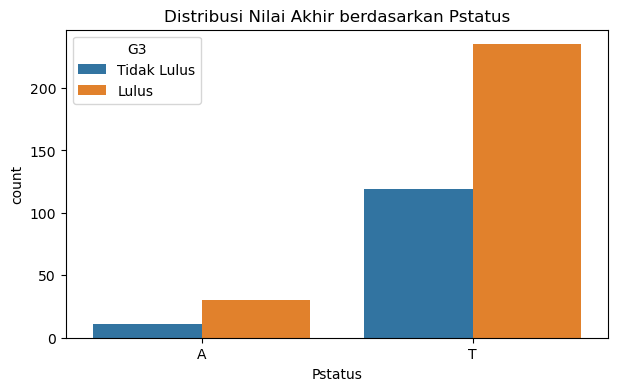

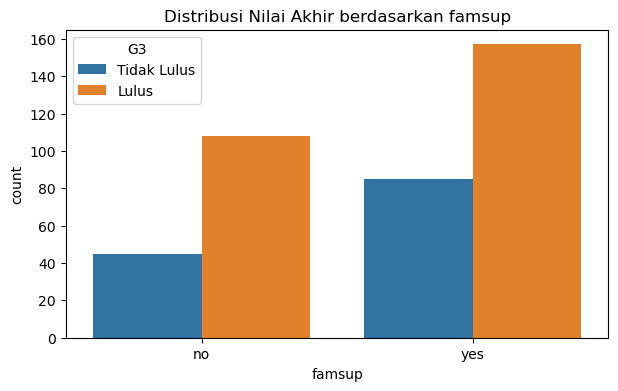

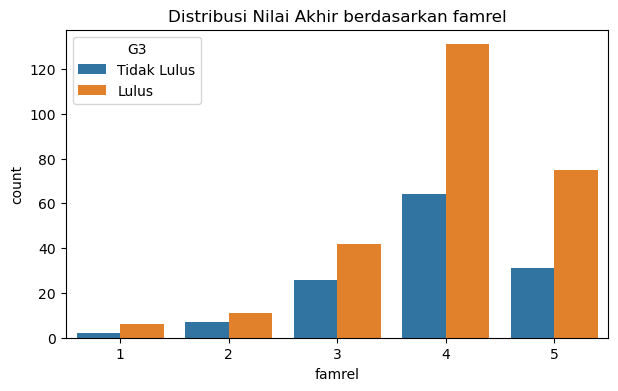

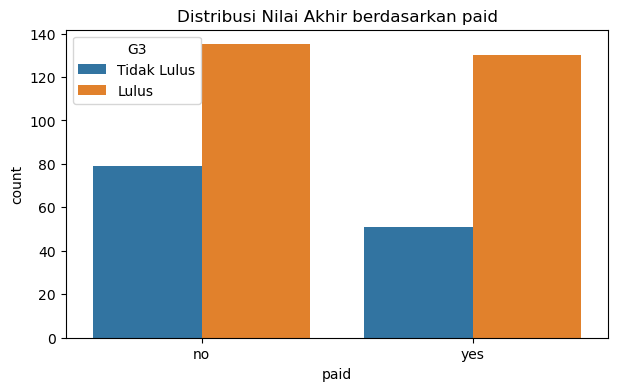

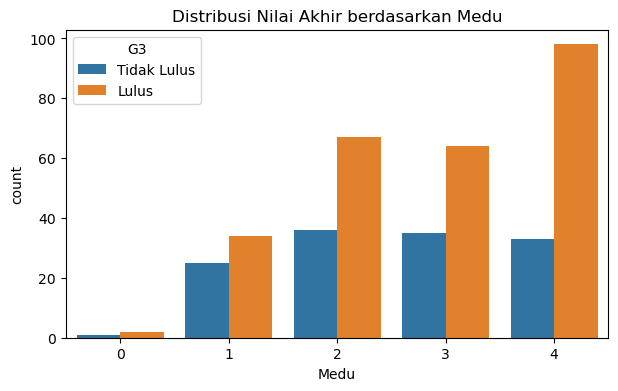

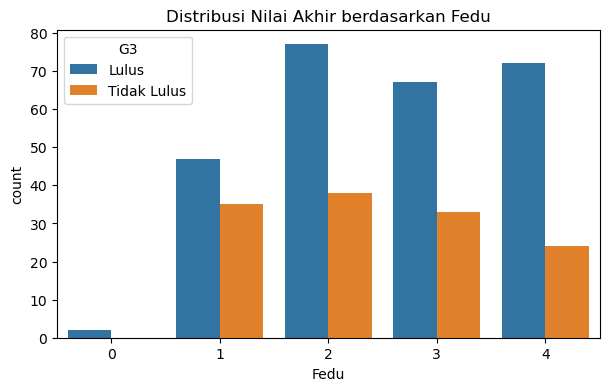

In [52]:
# Daftar kolom kategorikal sesuai tujuan
kategori = {
    "Demografi": ["school","sex", "age", "address","famsize","Mjob", "Fjob", "reason", "guardian" ],
    "Kebiasaan Belajar": ["traveltime","studytime", "failures", "higher", "schoolsup", "activities", "nursery","internet", "romantic","freetime","goout","Dalc", "Walc", "health", "absences"],
    "Dukungan Keluarga": ["Pstatus", "famsup", "famrel", "paid", "Medu", "Fedu"],
}

# Looping otomatis bikin countplot
for group, cols in kategori.items():
    print(f"\n=== {group} ===")
    for col in cols:
        plt.figure(figsize=(7,4))
        sns.countplot(x=col, hue="G3", data=df)
        plt.title(f"Distribusi Nilai Akhir berdasarkan {col}")
        plt.show()
        

In [56]:
#Mengembalikan nilai G3 ke seperti semula
df['G3'] = df['G3_original']

#Mengecek nilai G3 setelah dikembalikan
df[['G3', 'G3_original']].head()
df['G3'].dtype

df['G3_original'].unique()


array([ 6, 10, 15, 11, 19,  9, 12, 14, 16,  5,  8, 17, 18, 13, 20,  7,  0,
        4], dtype=int64)

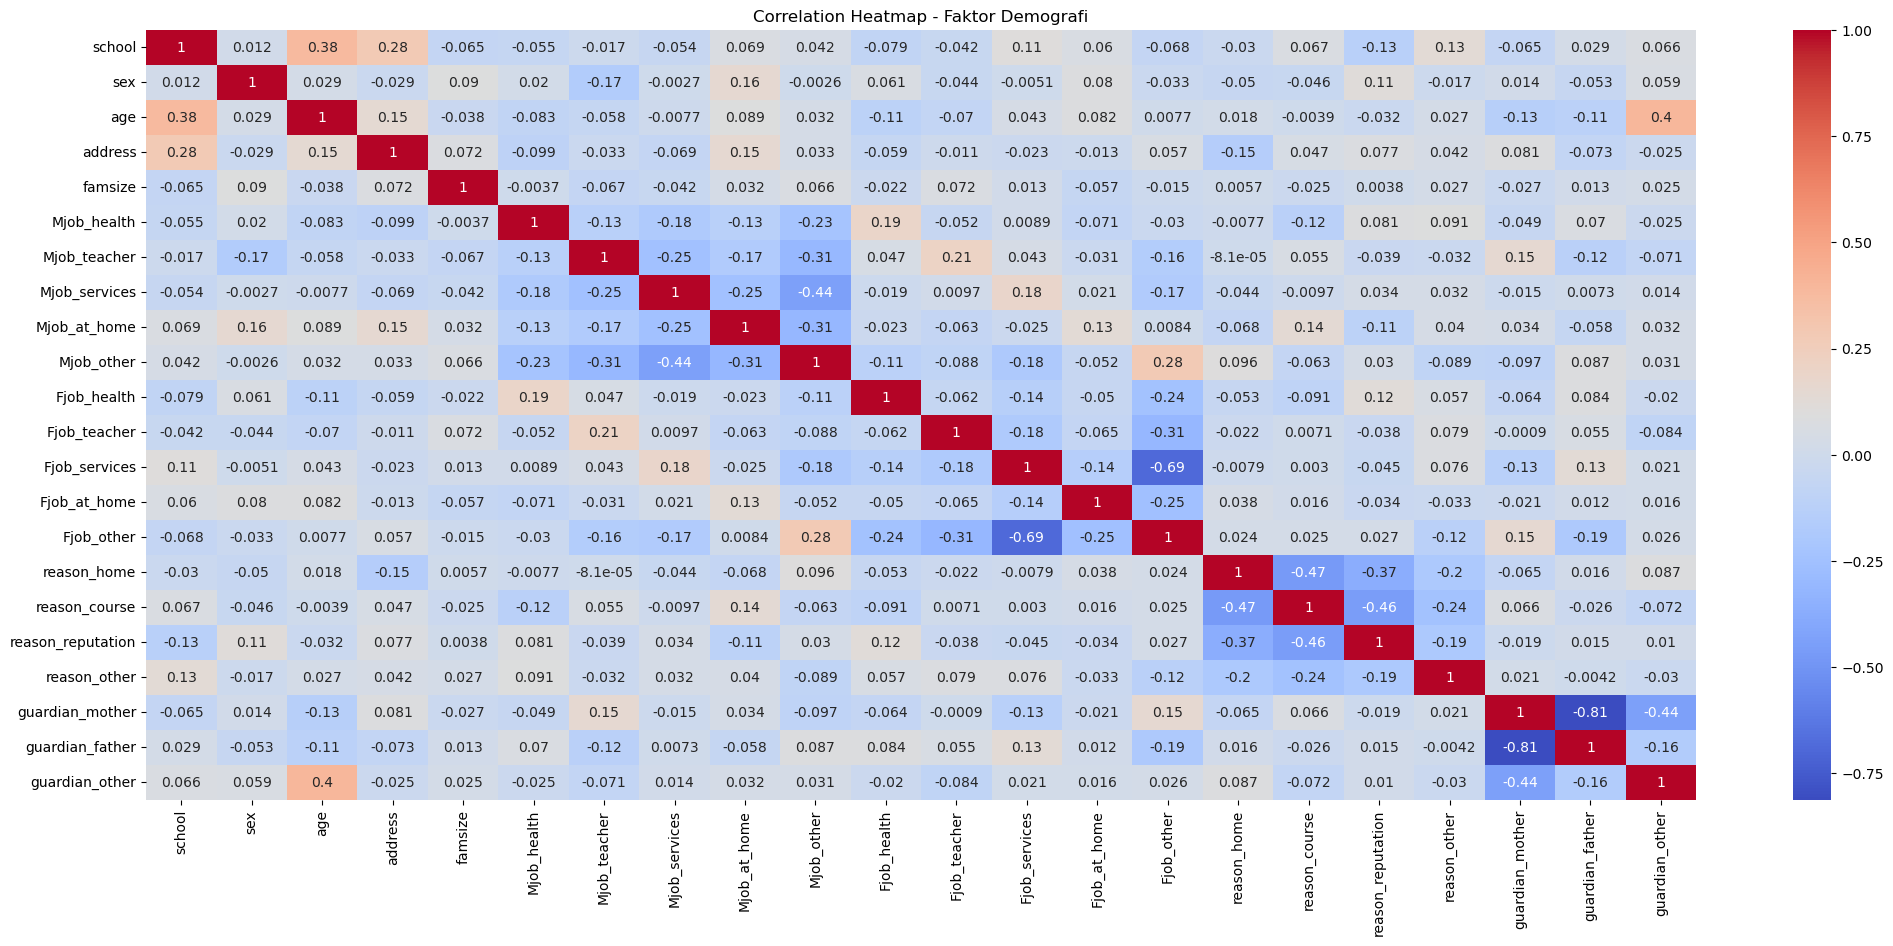

In [57]:
# Heatmap by Demografi
df_encoded = df.copy()

df_encoded['school'] = df_encoded['school'].map({'GP':0, 'MS':1})
df_encoded['sex'] = df_encoded['sex'].map({'M':0, 'F':1})
df_encoded['address'] = df_encoded['address'].map({'U':0, 'R':1})
df_encoded['famsize'] = df_encoded['famsize'].map({'LE3':0, 'GT3':1})

df_encoded = pd.get_dummies(df_encoded, columns=['Mjob'], drop_first=False)
df_encoded = pd.get_dummies(df_encoded, columns=['Fjob'], drop_first=False) 
df_encoded = pd.get_dummies(df_encoded, columns=['reason'], drop_first=False)
df_encoded = pd.get_dummies(df_encoded, columns=['guardian'], drop_first=False)

demo_cols= ["school","sex", "age", "address","famsize","Mjob_health","Mjob_teacher", 
            "Mjob_services","Mjob_at_home","Mjob_other","Fjob_health","Fjob_teacher",
            "Fjob_services","Fjob_at_home","Fjob_other", "reason_home","reason_course",
            "reason_reputation","reason_other", "guardian_mother","guardian_father","guardian_other"]


plt.figure(figsize=(25,10))
sns.heatmap(df_encoded[demo_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap - Faktor Demografi")
plt.show()


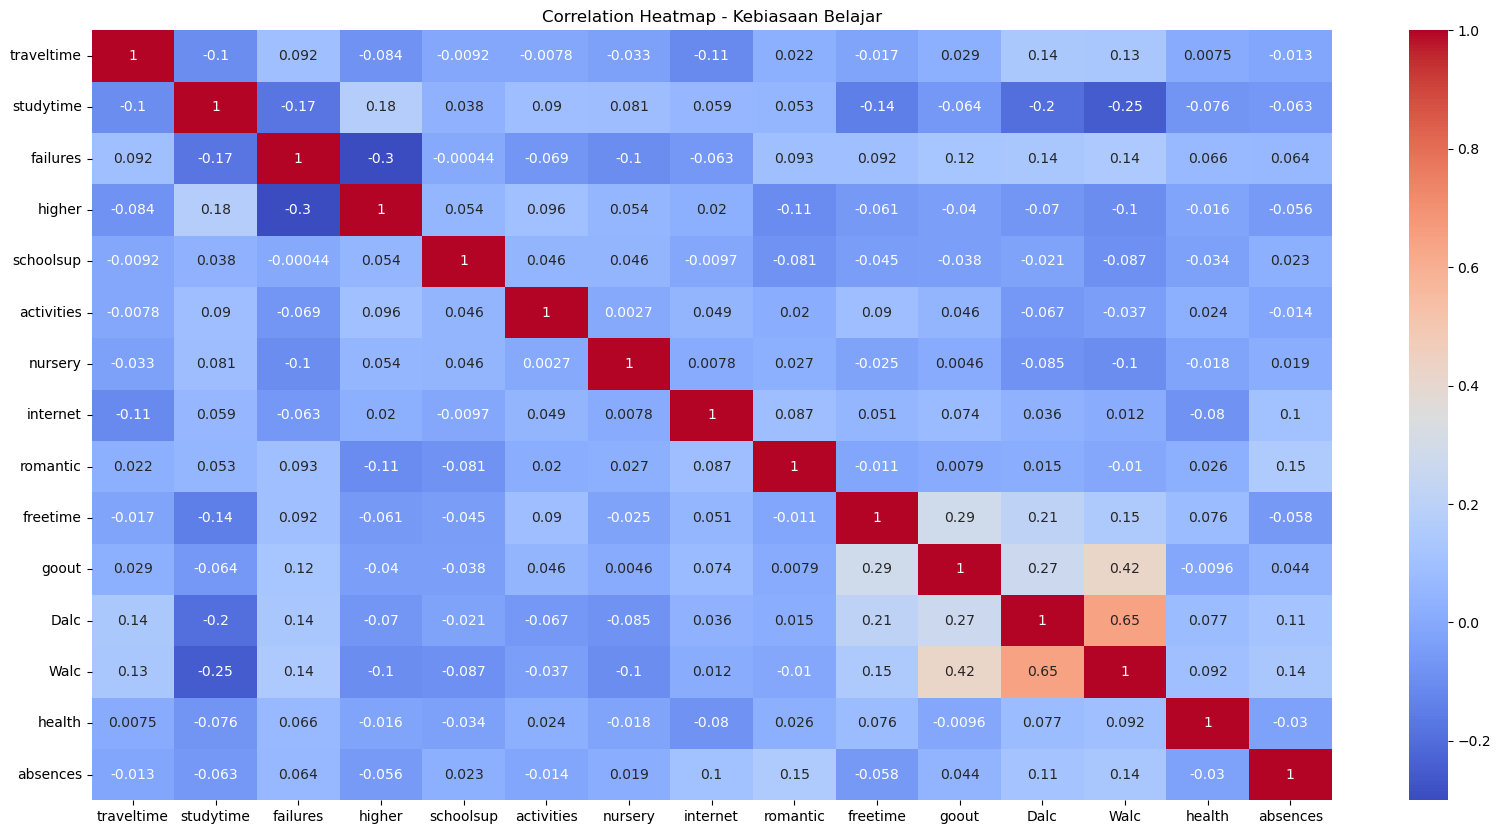

In [58]:
# Heatmap by Kebiasaan Belajar
df_encoded = df.copy()

df_encoded['higher'] = df_encoded['higher'].map({'yes':1, 'no':0})
df_encoded['schoolsup'] = df_encoded['schoolsup'].map({'yes':1, 'no':0})
df_encoded['activities'] = df_encoded['activities'].map({'yes':1, 'no':0})
df_encoded['nursery'] = df_encoded['nursery'].map({'yes':1, 'no':0})
df_encoded['internet'] = df_encoded['internet'].map({'yes':1, 'no':0})
df_encoded['romantic'] = df_encoded['romantic'].map({'yes':1, 'no':0})

KB_cols = ["traveltime","studytime", "failures", "higher", "schoolsup", "activities", 
           "nursery","internet", "romantic","freetime","goout","Dalc", "Walc", "health", "absences"]

plt.figure(figsize=(20,10))
sns.heatmap(df_encoded[KB_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap - Kebiasaan Belajar")
plt.show()

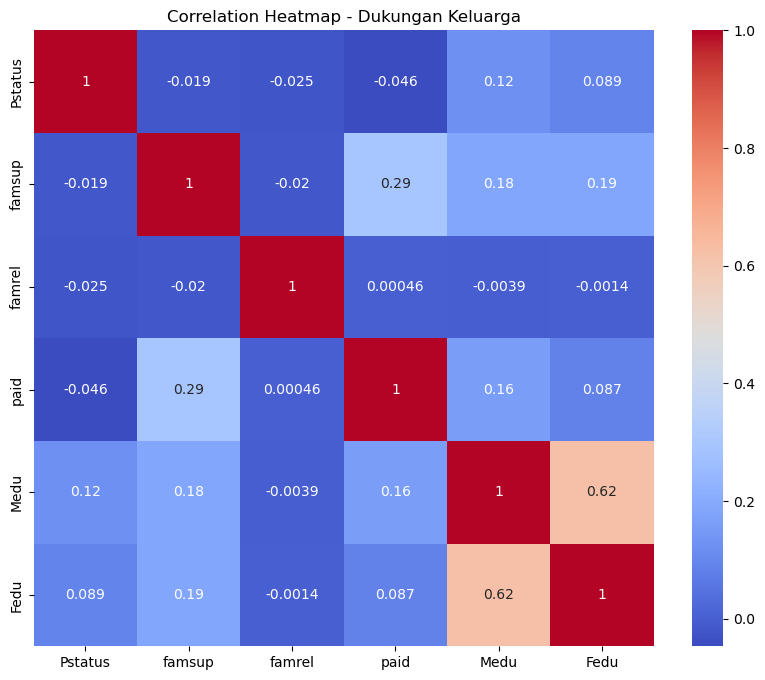

In [59]:
# Heatmap by Dukungan Keluarga
df_encoded = df.copy()

df_encoded['Pstatus'] = df_encoded['Pstatus'].map({'T':0, 'A':1})
df_encoded['famsup'] = df_encoded['famsup'].map({'yes':1, 'no':0}) 
df_encoded['paid'] = df_encoded['paid'].map({'yes':1, 'no':0}) 

DU_cols = ["Pstatus", "famsup", "famrel", "paid", "Medu", "Fedu"]

plt.figure(figsize=(10,8))
sns.heatmap(df_encoded[DU_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap - Dukungan Keluarga")
plt.show()

In [60]:
# Copy data asli
df_encoded = df.copy()

# Pastikan G3 numerik
df_encoded["G3"] = pd.to_numeric(df_encoded["G3"], errors="coerce")


In [61]:
# Ambil hanya kolom numerik
numeric_df = df_encoded.select_dtypes(include="number")

# Hitung korelasi ke G3
corr_g3 = numeric_df.corr()["G3"].dropna()

# Urutkan dari yang paling berpengaruh
corr_g3_sorted = corr_g3.sort_values(ascending=False)

# Tampilkan hasil
corr_g3_sorted.head(15), corr_g3_sorted.tail(15)


(G3_original    1.000000
 G3             1.000000
 G2             0.904868
 G1             0.801468
 Medu           0.217147
 Fedu           0.152457
 studytime      0.097820
 famrel         0.051363
 absences       0.034247
 freetime       0.011307
 Walc          -0.051939
 Dalc          -0.054660
 health        -0.061335
 traveltime    -0.117142
 goout         -0.132791
 Name: G3, dtype: float64,
 G2            0.904868
 G1            0.801468
 Medu          0.217147
 Fedu          0.152457
 studytime     0.097820
 famrel        0.051363
 absences      0.034247
 freetime      0.011307
 Walc         -0.051939
 Dalc         -0.054660
 health       -0.061335
 traveltime   -0.117142
 goout        -0.132791
 age          -0.161579
 failures     -0.360415
 Name: G3, dtype: float64)

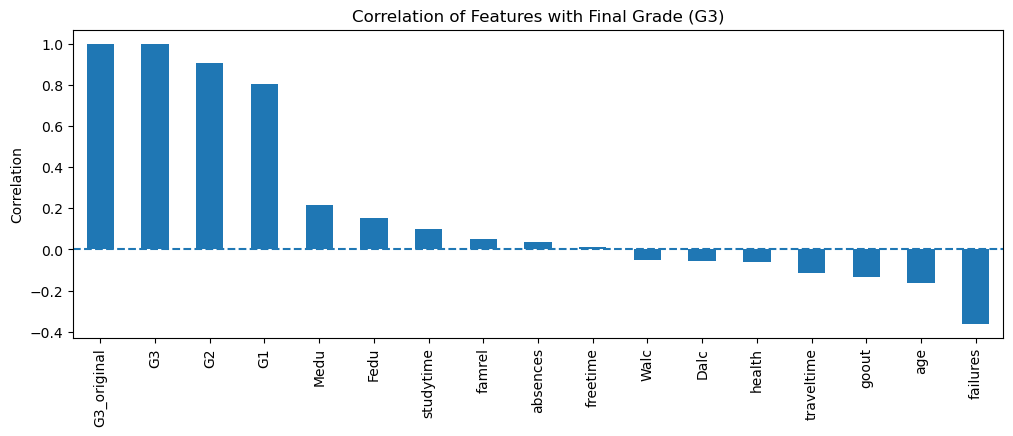

In [62]:
plt.figure(figsize=(12,4))
corr_g3_sorted.plot(kind="bar")
plt.axhline(0, linestyle="--")
plt.title("Correlation of Features with Final Grade (G3)")
plt.ylabel("Correlation")
plt.show()


## 🔝 Korelasi POSITIF paling besar

(semakin besar → semakin kuat hubungannya ke nilai akhir)

G2 (~0.9)
👉 nilai ujian periode sebelumnya sangat menentukan nilai akhir

G1 (~0.8)
👉 performa akademik awal berpengaruh besar ke hasil akhir

📌 Makna utama:

Prestasi akademik itu konsisten dari waktu ke waktu.

## 🔹 Korelasi positif MENENGAH

Medu (~0.22) → pendidikan ibu

Fedu (~0.16) → pendidikan ayah

studytime (~0.10) → waktu belajar

famrel (~0.05) → hubungan keluarga

absences (~0.03) → sangat kecil

📌 Makna:

- Dukungan keluarga **ada pengaruh**, tapi **tidak dominan**

- Pendidikan orang tua **lebih sebagai faktor pendukung**

## 🔻 Korelasi NEGATIF

(semakin ke bawah → semakin menurunkan nilai G3)

failures (~-0.35)
👉 faktor negatif TERKUAT
→ siswa yang sering gagal sebelumnya berisiko besar nilai akhir rendah

age (~-0.15)
👉 usia lebih tua → kemungkinan pernah tinggal kelas

goout (~-0.12)
👉 sering keluar / main → waktu belajar berkurang

traveltime (~-0.10)
👉 perjalanan jauh → capek / waktu belajar berkurang

Walc & Dalc (~-0.05 s.d -0.08)
👉 konsumsi alkohol → efek negatif tapi kecil

Nilai ujian akhir siswa paling dipengaruhi oleh performa akademik sebelumnya dan kebiasaan belajar. Faktor seperti jumlah kegagalan akademik, waktu belajar, serta kebiasaan sosial memiliki pengaruh yang lebih signifikan dibandingkan faktor demografi dan dukungan keluarga, yang cenderung berperan sebagai faktor pendukung.

### 4. Data Cleaning

Tujuan : untuk dilakukan pembersihan data supaya dataset siap dipakai untuk dianalisis.

# Yang dilakukan :
1. Mengatasi Missing Value ( Data yang Hilang )
2. Menghapus Duplikasi 
3. Menangani Data Outlier ( Data yang nilainya jauh berbeda dari mayoritas )
4. Standarisasi Format Data (Membuat Data Konsisten )
5. Membuang Noise / Irrelevant Data ( Membersihkan kolom yang tidak reelevan dan membuat dataset lebih fokus )
6. Memastikan Kualitas Data 

In [63]:
# 4. Tangani Missing Value

# Numerik
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Kategorikal
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [64]:
# Cek Missing Values
print("\n=== Missing Values ===")
print(df.isnull().sum())

# Cek Jumlah Duplikat
print("\n=== Jumlah Duplikat ===")
print(df.duplicated().sum())


=== Missing Values ===
school         0
sex            0
age            0
address        0
famsize        0
Pstatus        0
Medu           0
Fedu           0
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime     0
studytime      0
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher         0
internet       0
romantic       0
famrel         0
freetime       0
goout          0
Dalc           0
Walc           0
health         0
absences       0
G1             0
G2             0
G3             0
G3_original    0
dtype: int64

=== Jumlah Duplikat ===
0


### 5. Feature Engineering

Tujuan : Mengubah, membuat, atau memilih fitur agar data lebih informatif, konsisten, dan siap dipakai oleh model Machine learning, dengan tujuan untuk meningkatkan performa prediksi.


In [65]:
label_cols = ['sex','school','address','famsize', 'Pstatus','schoolsup','famsup',
              'paid','activities','nursery','higher','internet','romantic']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])


In [66]:
onehot_cols = ['Mjob','Fjob','reason','guardian']
df = pd.get_dummies(df, columns=onehot_cols, drop_first=True)


In [67]:
scaler = StandardScaler()
numerical_cols = ['age','studytime','failures','absences']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

### 6. Data Splitting
--> Proses memisahkan dataset menjadi beberapa bagian, biasanya training set dan testing set, sebelum membangun model machine learning.

Tujuan : sangat penting untuk mengukur performa model secara objektif

In [79]:
# Memisahkan fitur dan target
X = df.drop(columns=['G1','G2','G3'])  # semua fitur kecuali nilai
y = df['G3']  # gunakan nilai asli untuk regression

In [80]:
# Spli Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [81]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (316, 40)
X_test shape: (79, 40)
y_train shape: (316,)
y_test shape: (79,)


In [82]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 7. Modelling / Machine Learning

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Membuat objek model
model = LinearRegression()


In [86]:
# Melatih model dengan data training
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "KNN": KNeighborsRegressor()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print(f"=== {name} ===")
    print("MAE :", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R²  :", r2_score(y_test, y_pred))
    print()

=== Linear Regression ===
MAE : 3.4515287955435245e-15
RMSE: 4.454362985149533e-15
R²  : 1.0

=== Random Forest ===
MAE : 0.029493670886075973
RMSE: 0.07349330461194961
R²  : 0.9997365884724784

=== KNN ===
MAE : 2.8582278481012664
RMSE: 3.499656402664248
R²  : 0.40270340386959635



| Model               | Akurasi |
| ------------------- | ------- |
| Logistic Regression | \~100%   |
| Random Forest       | \~99%   |
| KNN                 | \~40%   |


### 8. Evaluation Model

Menggunakan Model logistic regression sebagai model terbaik lalu membuat confusion matrix untuk melihat performa prediksi lebih detail.



In [88]:
best_model = LinearRegression()
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)

#### 9. Hyperparameter Tuning (Machine Learning)
Dilakukan pencarian parameter terbaik untuk Random Forest menggunakan GridSearchCV:

GridSearchCV adalah metode untuk mencari kombinasi parameter terbaik pada model machine learning dengan cara mencoba semua kemungkinan kombinasi (grid search) dan memilih yang menghasilkan performa terbaik berdasarkan evaluasi (cross-validation).


In [89]:
param_grid = {
    'fit_intercept': [True, False],   # apakah mau ada intercept atau tidak
    'positive': [True, False]         # apakah koefisien semua harus positif
}

grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score (R²):", grid_search.best_score_)

Best Parameters: {'fit_intercept': True, 'positive': True}
Best Score (R²): 1.0


## Insight

1. Kebiasaan belajar merupakan faktor paling berpengaruh dalam memprediksi nilai ujian akhir siswa, terutama riwayat kegagalan, waktu belajar, dan tingkat kehadiran.
2. Faktor demografi memiliki pengaruh yang relatif kecil terhadap nilai ujian akhir dan bukan penentu utama performa akademik siswa.
3. Dukungan keluarga berperan sebagai faktor pendukung, namun dampaknya tidak sebesar kebiasaan belajar dan performa akademik sebelumnya.